<a href="https://colab.research.google.com/github/VarnikaKamra/ComputerVisionWorld/blob/main/Object%20Detection/Face_and_Eye_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2


In [ ]:
import numpy

**Reading and Displaying Images in Open CV**

In [ ]:
#Load an image by specifying the image path
input = cv2.imread("/content/download.jpeg")

In [ ]:
#Display the image
cv2.imshow('Elephant image',input)

#Disabled Function in Colab

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


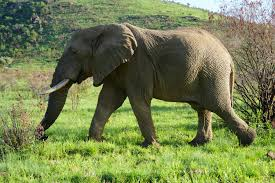

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(input)

cv2.waitKey()
cv2.destroyAllWindows() #Closes all open windows. Failure to place this will cause the program to end

In [ ]:
#Closer look at how images are stored
print(input.shape) #gives the dimension of image array; height, width, no.of channels (colorful image =3 ->RGB)

print("Height of image is ",int(input.shape[0]),"pixels")
print("Width of image is ",int(input.shape[1]),"pixels")

(183, 275, 3)
Height of image is  183 pixels
Width of image is  275 pixels


In [ ]:
#Saving the image in another format as well

cv2.imwrite('output.jpg',input)
cv2.imwrite('output.png',input)


True

**Face and Eye Detection from Images using HAAR Cascade Classifier**

[HAAR Cascade Classifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-9-ebd240798dd2>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


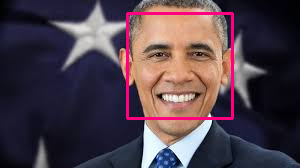

In [ ]:
import numpy as np
import cv2

#Point CV2's Cascade Classifier to where our CLassifier (XML) is stored
face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

#Load the image and convert into grayscale (To ease the processing)
image = cv2.imread('/content/Obama.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5) #Features / Location of the face in image
#detectMultiScale(input image, Scale Factor , Min Neighbors)

if faces is ():
  print("No faces found")

#Draw a rectangle around the face
for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y),(x+w,y+h),(127,0,255),2)
  cv2_imshow(image)
  cv2.waitKey(0)

cv2.destroyAllWindows()


<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-e03f63f8b4ff>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


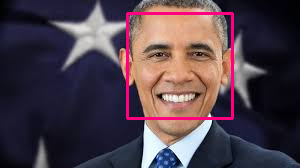

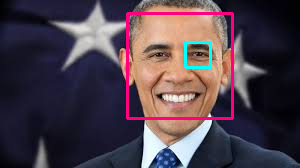

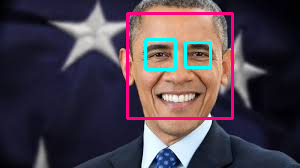

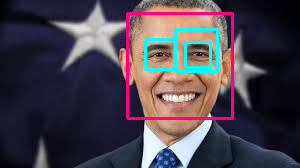

In [ ]:
#Combine face and eye detection

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

image = cv2.imread('/content/Obama.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

if faces is ():
  print("No faces found")

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y),(x+w,y+h),(127,0,255),2)
  cv2_imshow(image)
  cv2.waitKey(0)
  roi_gray = gray[y:y+h,x:x+w] #Crop the face
  roi_color = image[y:y+h,x:x+w] #Colored image of the cropped face
  eyes = eye_classifier.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    cv2_imshow(image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img

    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2_imshow(face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-21-2e560e00586c>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


TypeError: 'NoneType' object is not subscriptable

**Face and Eye detection from webcam using HAAR Cascade**

In [ ]:
import cv2

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

def detect(gray, frame):
  faces = face_classifier.detectMultiScale(gray, 1.3, 5)
  for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = frame[y:y + h, x:x + w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.1, 3)
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
  return frame

video_capture = cv2.VideoCapture(0)  # Default webcam

while True:
  ret, frame = video_capture.read()
  # Check if frame is successfully read
  if not ret:
    print("Error: Could not read frame from camera.")
    break  # Exit the loop if frame reading fails

  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Change image to frame
  canvas = detect(gray, frame)
  cv2_imshow(canvas)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

video_capture.release()
cv2.destroyAllWindows()

Error: Could not read frame from camera.


In [ ]:
# prompt: read a video using Open CV

import cv2
from google.colab.patches import cv2_imshow

# Replace 'your_video.mp4' with the actual path to your video file
video_capture = cv2.VideoCapture('/content/video.mp4')

if not video_capture.isOpened():
    print("Error: Could not open video file.")
else:
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("End of video.")
            break

        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()

**Car Detection**